# Pet breeds Analysis

In [1]:
from fastai import *
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#2) [Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
imagesPath = path/"images"
imagesPath.ls()

(#7393) [Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/samoyed_48.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/chihuahua_119.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_82.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/Bengal_182.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/keeshond_190.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/english_setter_96.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/Abyssinian_101.mat'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/Bengal_75.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/saint_bernard_195.jpg'),Path('/home/vinayak/.fastai/data/oxford-iiit-pet/images/Siamese_80.jpg')...]

In [5]:
def get_y(name): return re.findall(r"([a-zA-Z_]+)_\d+", name.name)[0]

In [6]:
datablock = DataBlock((ImageBlock, CategoryBlock),
                       get_items = get_image_files,
                       # Ideally the creators of the dataset have specified 50% trainval and 50% test
                       # To be as close as possible to that scenario, let's only train on 50% of the entire set
                       splitter = RandomSplitter(seed = 73, valid_pct = 0.5),
                       get_y = get_y,
                       item_tfms = Resize(500),
                       batch_tfms=aug_transforms(size=224, min_scale=0.75))

datablock.summary(path/"images")

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 3695,3695
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /home/vinayak/.fastai/data/oxford-iiit-pet/images/saint_bernard_45.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x400
  Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /home/vinayak/.fastai/data/oxford-iiit-pet/images/saint_bernard_45.jpg
    applying get_y gives
      saint_bernard
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(30)

Final sample: (PILImage mode=RGB size=500x400, TensorCategory(30))


Found 7390 items
2 datasets of sizes 3695,3695
Setting up Pipeline: PILBase.create
Setting up Pipeline: get_y -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Sett

In [7]:
dls = datablock.dataloaders(path/"images", bs = 32)

In [8]:
x, y = dls.one_batch()

In [9]:
dls.vocab

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']

In [10]:
x.shape, y.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

# Learning Rate Comparison

## At the lowest loss

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.009120108559727669)

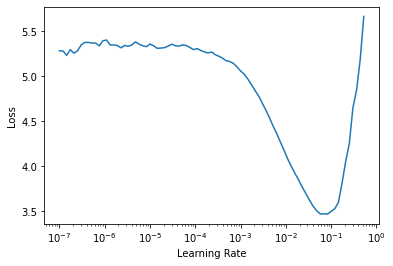

In [85]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [86]:
len(learn.recorder.lrs)

90

In [87]:
learn.recorder.lrs[:10]

[1e-07,
 1.202264434617413e-07,
 1.4454397707459274e-07,
 1.7378008287493754e-07,
 2.0892961308540395e-07,
 2.51188643150958e-07,
 3.019951720402016e-07,
 3.6307805477010137e-07,
 4.36515832240166e-07,
 5.248074602497725e-07]

In [12]:
# Selecting a learning rate at the valley
learn.fit_one_cycle(5, 1e-1)

epoch,train_loss,valid_loss,error_rate,time
0,4.816136,8.262578,0.968336,00:39
1,5.648250,6.231769,0.975101,00:39
2,4.565045,11.770223,0.972395,00:39
3,3.731674,4.769359,0.970501,00:39
4,3.299245,4.675569,0.970771,00:39


## At an order of magnitude lower than the lowest loss

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0063095735386013985)

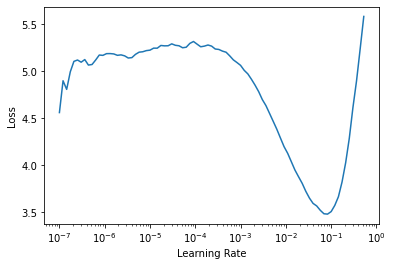

In [13]:
# Reinitialize the learner and select a learning rate an order of magnitude less than lowest loss point
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [14]:
# Selecting a learning rate at an order of magnitude less than the valley
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,1.139060,3.016261,0.660893,00:39
1,1.543067,4.190102,0.822192,00:39
2,0.977125,2.463180,0.610555,00:39
3,0.642600,1.424785,0.409472,00:39
4,0.421369,1.324629,0.391069,00:39


## At the steepest decrease in the learning rate

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.007585775572806597)

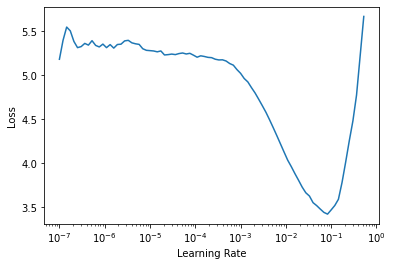

In [15]:
# Reinitialize the learner and run lr_find
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [16]:
# Selecting a learning rate at the steepest point of decline in loss
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.103051,1.154106,0.352909,00:39
1,0.772039,0.810621,0.253586,00:39
2,0.488881,0.809178,0.251691,00:39
3,0.359864,0.772057,0.242219,00:39
4,0.335133,0.755386,0.237348,00:39


# Learner state after lr_find

In [17]:
# Store the model parameters after creating a learner 
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [18]:
# Save all parameter tensors in an array
params = learn.model.parameters()
original_ps = []
for p in params:
    original_ps.append(p)

SuggestedLRs(lr_min=0.005754399299621582, lr_steep=0.010964781977236271)

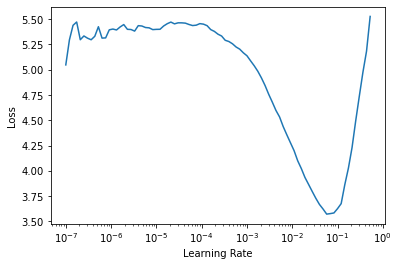

In [19]:
learn.lr_find()

In [20]:
# Save all parameter tensors in an array
params = learn.model.parameters()
postlr_ps = []
for p in params:
    postlr_ps.append(p)

In [21]:
for original_param, postlr_param in zip(original_ps, postlr_ps):
    print(torch.equal(original_param, postlr_param))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Discriminative Learning Rate

## Normal learning rate

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.00363078061491251)

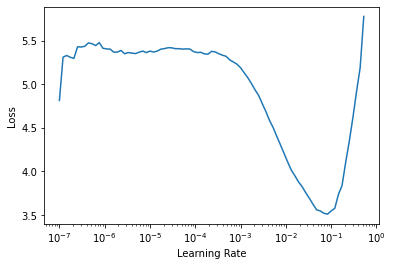

In [94]:
# Store the model parameters after creating a learner 
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [23]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.236824,1.272181,0.382679,00:41
1,0.801375,0.897746,0.274966,00:40
2,0.515050,0.803683,0.256292,00:41
3,0.390211,0.708438,0.225710,00:40
4,0.313081,0.741692,0.231394,00:40


SuggestedLRs(lr_min=1.0964782268274575e-05, lr_steep=9.12010818865383e-07)

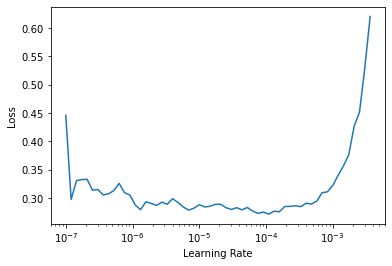

In [25]:
learn.unfreeze()
learn.lr_find()

In [26]:
learn.fit_one_cycle(5, 1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.296813,0.758172,0.240325,00:49
1,0.291766,0.686181,0.219215,00:50
2,0.278992,0.711777,0.220027,00:49
3,0.266082,0.657623,0.207578,00:48
4,0.241011,0.676902,0.211637,00:48


In [51]:
len(learn.opt.param_groups)

3

In [37]:
learn.opt.hypers

(#3) [{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 2.3267289679481024e-10, 'mom': 0.9499986732577645, 'eps': 1e-05},{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 2.3267289679481024e-10, 'mom': 0.9499986732577645, 'eps': 1e-05},{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 2.3267289679481024e-10, 'mom': 0.9499986732577645, 'eps': 1e-05}]

In [95]:
learn.summary()

Sequential (Input shape: 32)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                      

## Discriminative learning rate

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.00363078061491251)

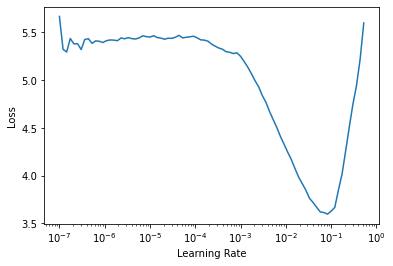

In [52]:
# Create a brand new learner
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.lr_find()

In [53]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,2.285283,1.194587,0.367524,00:39
1,0.811639,1.010418,0.304195,00:41
2,0.475904,0.860038,0.262788,00:42
3,0.370602,0.757779,0.235183,00:40
4,0.319319,0.720379,0.221110,00:41


SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=3.981071586167673e-06)

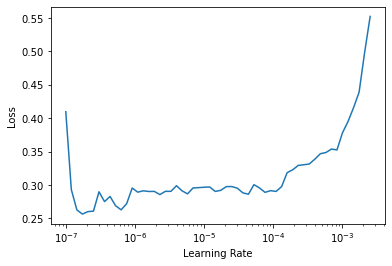

In [54]:
learn.unfreeze()
learn.lr_find()

In [55]:
learn.fit_one_cycle(10, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.284923,0.789884,0.241137,00:48
1,0.292850,0.789408,0.240325,00:48
2,0.271093,0.737346,0.224087,00:50
3,0.286959,0.724136,0.225710,00:48
4,0.272797,0.759628,0.233288,00:48
5,0.291474,0.745162,0.229499,00:49
6,0.256864,0.772623,0.238701,00:49
7,0.241703,0.729144,0.223816,00:49
8,0.247407,0.746030,0.229499,00:48
9,0.256304,0.719026,0.221380,00:49


In [56]:
learn.opt.hypers

(#3) [{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 1.3316833421362379e-11, 'mom': 0.9499996683133409, 'eps': 1e-05},{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 4.2111524833022884e-11, 'mom': 0.9499996683133409, 'eps': 1e-05},{'wd': 0.01, 'sqr_mom': 0.99, 'lr': 1.331683342140473e-10, 'mom': 0.9499996683133409, 'eps': 1e-05}]